DIMENSIONALITY REDUCTION
Trying PCA and various other methods to reduce # of features

To target encode: 'MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2','HouseStyle', 'RoofStyle', 'Exterior1st', 'Electrical', 'ClassPr_S'

Label Encoded: Foundation, 

Added: 'TotalFinSF', 'TotalPorchSF', 'Total_Baths'

Dropped:'Unnamed: 0',  'Prop_Addr', 'TotRmsAbvGrd', 'NmbrBRs', 'FireplaceQu', 'GarageCond', 'PoolQC', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF', 'GrLivArea','BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtFinSF', 'YmSold', 'MoSold', 'GarageArea', 'Alley', 'HouseStyle', 'ClassSc_S', 'RoofMatl', 'GarageQual', 'GarageType', 'GarageYrBlt', 'BsmtCond', 'BsmtFinType2', LandContour, LandSlope, LotConfig, Heating, 'Fence', 'PoolArea', 'MiscFeature', 'MiscVal', KitchenAbvGr, SaleType, BldgType, Street, 1stFlrSF', '2ndFlrSF', YrSold, YmSold

In [110]:
import numpy as np
import pandas as pd
ames_geo_pca = pd.read_csv(r"C:\users\willf\OneDrive\Documents\NYDSA\Machine Learning Project\Machine Learning Project Proposal\ames_geo_final.csv", keep_default_na=False)

In [111]:
ames_geo_pca.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive

In [112]:
# Drop unknown, identifier, addresses, sale-price-related and one of highly correlated columns

ames_geo_pca = ames_geo_pca.drop(columns=['Unnamed: 0',  'Prop_Addr', 
                                         'TotRmsAbvGrd', 'NmbrBRs', 'FireplaceQu', 'GarageCond', 'PoolQC'])
ames_geo_pca.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

-------------------------------------BATHROOMS-----------------------------------------------------------------

In [113]:
ames_geo_pca['total_baths'] = ames_geo_pca[['FullBath', 'BsmtFullBath']].sum(axis=1) + (ames_geo_pca[['HalfBath', 'BsmtHalfBath']].sum(axis=1)/2)

# print(ames_geo_pca[['total_baths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sort_values(by='HalfBath', ascending=False))



In [114]:
# Check corrs
import matplotlib.pyplot as plt
import seaborn as sns

corr = ames_geo_pca['total_baths'].corr(ames_geo_pca['SalePrice'])
corr

0.637941884884641

In [115]:
# Check out numerical features
ames_geo_pca_baths = ames_geo_pca[['PID','FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]

ames_geo_pca_baths['HalfBath'] = ames_geo_pca_baths['HalfBath'] /2

ames_geo_pca_baths['BsmtHalfBath'] = ames_geo_pca_baths['BsmtHalfBath'] /2

ames_geo_pca_baths.sort_values(by='HalfBath', ascending=False)

C:\Users\willf\AppData\Local\Temp\ipykernel_45508\739824837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_pca_baths['HalfBath'] = ames_geo_pca_baths['HalfBath'] /2
C:\Users\willf\AppData\Local\Temp\ipykernel_45508\739824837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_pca_baths['BsmtHalfBath'] = ames_geo_pca_baths['BsmtHalfBath'] /2


,PID,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
1029,527359010,1,1.0,0.0,0.5
112,534129230,1,1.0,1.0,0.0
655,535426130,1,1.0,0.0,0.5
1402,908102040,2,1.0,2.0,0.0
1275,534151120,1,1.0,0.0,0.0
...,...,...,...,...,...
1027,535180130,1,0.0,0.0,0.0
1024,534278070,2,0.0,1.0,0.0
1023,905480210,1,0.0,1.0,0.0
1021,905377130,1,0.0,0.0,0.0


In [116]:
# Test what PCA makes out of 4 bathroom variables
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
X = ames_geo_pca_baths[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Create DF
pca_df = pd.DataFrame(data=X_pca, columns = ['PC_Baths1'])

# Join back the PID column
pca_df = pd.concat([ames_geo_pca_baths[['PID']].reset_index(drop=True), pca_df], axis=1)

In [117]:
# Merge baths cols, total_baths and SalePrice/LogSalePrice to one DF
ames_geo_pca_baths = ames_geo_pca_baths.merge(pca_df, on='PID', how='left')
ames_geo_pca_baths['total_baths'] = ames_geo_pca_baths[['FullBath', 'BsmtFullBath']].sum(axis=1) + (ames_geo_pca_baths[['HalfBath', 'BsmtHalfBath']].sum(axis=1)/2)
ames_geo_pca_baths = ames_geo_pca_baths.merge(ames_geo_pca[['PID','SalePrice', 'LogSalePrice']], on='PID', how='left')

ames_geo_pca_baths

,PID,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,PC_Baths1,total_baths,SalePrice,LogSalePrice
0,909176150,1,0.0,1.0,0.0,-0.990057,2.00,126000,11.744037
1,905476230,2,0.0,1.0,0.0,0.179146,3.00,139500,11.845820
2,911128020,1,0.0,0.0,0.0,-1.094019,1.00,124900,11.735269
3,535377150,1,0.0,0.0,0.0,-1.094019,1.00,114000,11.643954
4,534177230,2,0.5,1.0,0.0,1.504929,3.25,227000,12.332705
...,...,...,...,...,...,...,...,...,...
2551,903205040,1,0.0,0.0,0.0,-1.094019,1.00,121000,11.703546
2552,905402060,2,0.0,0.0,0.0,0.075184,2.00,139600,11.846536
2553,909275030,2,0.0,0.0,0.0,0.075184,2.00,145000,11.884489
2554,907192040,2,0.5,1.0,0.0,1.504929,3.25,217500,12.289954


In [118]:
# See if the PCA aggregation is better correlated to the sale price than total baths
corr_pca_baths = ames_geo_pca_baths['PC_Baths1'].corr(ames_geo_pca_baths['SalePrice'])
corr_total_baths = ames_geo_pca_baths['total_baths'].corr(ames_geo_pca_baths['SalePrice'])

print(f"PCA corr: {corr_pca_baths} \n Total baths corr: {corr_total_baths}")

PCA corr: 0.507901304181764 
 Total baths corr: 0.6254651549683221


Interpretation: the PCA feature for the num baths variables correlated worse with the outcome variable than simply adding up the number of baths. So I should use total_baths as my feature instead.

In [119]:
# Drop PCA_Baths1 & single bath features
ames_geo_pca = ames_geo_pca.drop(columns=['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'])
ames_geo_pca.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscFeature', 'M

--------------------------------------------- PORCHES, DECKS, Etc. ------------------------------------------------

In [120]:
# Check columns
ames_geo_pca[ames_geo_pca['WoodDeckSF'] != 0].shape[0]


1237

In [121]:
# Check number of porch types that are not zeros
count_encporch = ames_geo_pca[ames_geo_pca['EnclosedPorch'] != 0].shape[0]
count_opnporch = ames_geo_pca[ames_geo_pca['OpenPorchSF'] != 0].shape[0]
count_3Ssnporch = ames_geo_pca[ames_geo_pca['3SsnPorch'] != 0].shape[0]
count_scrnporch = ames_geo_pca[ames_geo_pca['ScreenPorch'] != 0].shape[0]

print(f"Porch type counts\nEnclosed: {count_encporch}\nOpen: {count_opnporch}\n 3 season: {count_3Ssnporch} \nScreened: {count_scrnporch} ")


Porch type counts
Enclosed: 400
Open: 1401
 3 season: 30 
Screened: 225 


In [122]:
# Filter rows where Porch types are zero (none) and check corrs
non_zero_encporch = ames_geo_pca[ames_geo_pca['EnclosedPorch'] != 0]
corr_encporch = non_zero_encporch['EnclosedPorch'].corr(non_zero_encporch['LogSalePrice'])

non_zero_opnporch = ames_geo_pca[ames_geo_pca['OpenPorchSF'] != 0]
corr_opnporch = non_zero_opnporch['OpenPorchSF'].corr(non_zero_opnporch['LogSalePrice'])

non_zero_3snporch = ames_geo_pca[ames_geo_pca['3SsnPorch'] != 0]
corr_3snporch = non_zero_3snporch['3SsnPorch'].corr(non_zero_3snporch['LogSalePrice'])

non_zero_scrnporch = ames_geo_pca[ames_geo_pca['ScreenPorch'] != 0]
corr_scrnporch = non_zero_scrnporch['ScreenPorch'].corr(non_zero_scrnporch['LogSalePrice'])

non_zero_deck = ames_geo_pca[ames_geo_pca['WoodDeckSF'] != 0]
corr_deck = non_zero_scrnporch['WoodDeckSF'].corr(non_zero_scrnporch['LogSalePrice'])

print(f"Porch variable correlations (excluding zeros):\n Enclosed: {corr_encporch}\n Open: {corr_opnporch}\n 3 season: {corr_3snporch} \n Screened: {corr_scrnporch} \n Deck: {corr_deck}")


Porch variable correlations (excluding zeros):
 Enclosed: 0.2236395872754349
 Open: 0.06324155390674359
 3 season: 0.1590442944144981 
 Screened: 0.22950529320837296 
 Deck: 0.21673391674791498


In [123]:
# Create porches DF to experiment with
ames_geo_porches = ames_geo_pca[['PID','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF']]
ames_geo_porches['TotalPorchSF'] = ames_geo_pca[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF']].sum(axis=1)
ames_geo_porches


C:\Users\willf\AppData\Local\Temp\ipykernel_45508\2343580337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_porches['TotalPorchSF'] = ames_geo_pca[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF']].sum(axis=1)


,PID,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,WoodDeckSF,TotalPorchSF
0,909176150,0,0,0,166,0,166
1,905476230,105,0,0,0,0,105
2,911128020,0,42,86,0,154,282
3,535377150,0,168,0,111,0,279
4,534177230,45,0,0,0,0,45
...,...,...,...,...,...,...,...
2551,903205040,98,0,0,40,0,138
2552,905402060,0,0,0,0,0,0
2553,909275030,0,0,0,0,0,0
2554,907192040,96,0,0,0,193,289


In [124]:
# Try PCA for aggregating porch-related features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF']
X = ames_geo_porches[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Create DF
pca_df = pd.DataFrame(data=X_pca, columns = ['PC_Porches'])

# Join back the PID column
pca_porches_df = pd.concat([ames_geo_porches[['PID']].reset_index(drop=True), pca_df], axis=1)

In [125]:
# Create porches DF

# pca_porches_df = pca_porches_df.merge(ames_geo_porches, on='PID', how='left')
pca_porches_df = pca_porches_df.merge(ames_geo_pca[['PID','SalePrice', 'LogSalePrice']], on='PID', how='left')
pca_porches_df

,PID,PC_Porches,SalePrice,LogSalePrice
0,909176150,-0.194238,126000,11.744037
1,905476230,-0.153441,139500,11.845820
2,911128020,0.316174,124900,11.735269
3,535377150,1.839769,114000,11.643954
4,534177230,0.235193,227000,12.332705
...,...,...,...,...
2551,903205040,-0.281813,121000,11.703546
2552,905402060,0.526669,139600,11.846536
2553,909275030,0.526669,145000,11.884489
2554,907192040,-0.905905,217500,12.289954


In [126]:
# Check PCA vs total porches corrs
pca_porches_corr = pca_porches_df['PC_Porches'].corr(pca_porches_df['LogSalePrice'])
total_porches_corr = ames_geo_porches['TotalPorchSF'].corr(pca_porches_df['LogSalePrice'])

print(f"pca corr: {pca_porches_corr} \n total corr: {total_porches_corr}")

pca corr: -0.41245049855782273 
 total corr: 0.39641968316399107


In [127]:
# The negative PCA correlation doesn't make intuitive sense to me so I'll go with total porches
ames_geo_pca['TotalPorchSF'] = ames_geo_pca[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF']].sum(axis=1)
ames_geo_pca = ames_geo_pca.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'])
ames_geo_pca.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'PavedDrive', 'PoolArea', 'Fence',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'LogSalePrice', 

-----------------------------Sizes (square feet) --------------------------------------------

In [128]:
# Create DF to test different SF vars
ames_geo_sf = ames_geo_pca[['GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','SalePrice','LogSalePrice']]

In [129]:
# Calc various aggregations of SF features
ames_geo_sf['TotalBsmtFinSF'] = ames_geo_sf['BsmtFinSF1'] + ames_geo_sf['BsmtFinSF2']
ames_geo_sf['TotalFinSF'] = ames_geo_sf['TotalBsmtFinSF'] + ames_geo_sf['GrLivArea']

ames_geo_sf.columns

C:\Users\willf\AppData\Local\Temp\ipykernel_45508\3049897502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_sf['TotalBsmtFinSF'] = ames_geo_sf['BsmtFinSF1'] + ames_geo_sf['BsmtFinSF2']
C:\Users\willf\AppData\Local\Temp\ipykernel_45508\3049897502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_sf['TotalFinSF'] = ames_geo_sf['TotalBsmtFinSF'] + ames_geo_sf['GrLivArea']


Index(['GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'SalePrice', 'LogSalePrice',
       'TotalBsmtFinSF', 'TotalFinSF'],
      dtype='object')

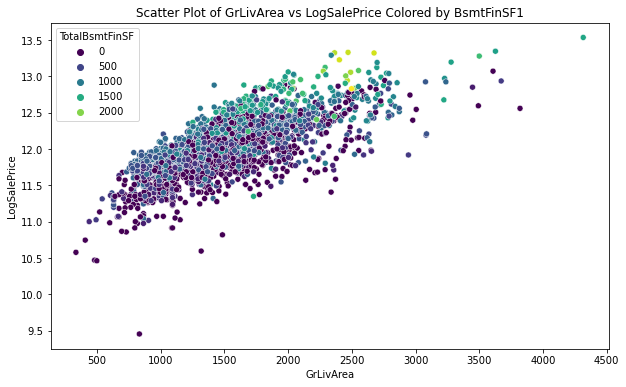

In [130]:
# Check how various size variables impact the GrLivArea vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(data=ames_geo_sf, x='GrLivArea', y='LogSalePrice', hue='TotalBsmtFinSF', palette='viridis')


plt.title('Scatter Plot of GrLivArea vs LogSalePrice Colored by BsmtFinSF1')
plt.xlabel('GrLivArea')
plt.ylabel('LogSalePrice')
plt.show()

# Basement SF seems to just be seen as additional living square footage for the most part

In [131]:
# Check correlations of nonzero values
nz_totbsmtfin = ames_geo_sf[ames_geo_sf['TotalBsmtFinSF'] != 0]
nz_bsmtunfin = ames_geo_sf[ames_geo_sf['BsmtUnfSF'] != 0]
nz_lqualfin = ames_geo_sf[ames_geo_sf['BsmtUnfSF'] != 0]

corr_totalfin = ames_geo_sf['TotalFinSF'].corr(ames_geo_sf['LogSalePrice'])
corr_grliv = ames_geo_sf['GrLivArea'].corr(ames_geo_sf['LogSalePrice'])
corr_totbsmtfin = nz_totbsmtfin['TotalBsmtFinSF'].corr(nz_totbsmtfin['LogSalePrice'])
corr_bsmtunfin = nz_bsmtunfin['BsmtUnfSF'].corr(nz_bsmtunfin['LogSalePrice'])
corr_lqualfin = nz_lqualfin['LowQualFinSF'].corr(nz_lqualfin['LogSalePrice'])

print(f"SF feature correlations\nTotal Finished: {corr_totalfin}\nGrLivArea: {corr_grliv}\nTotal Bsmt Fin: {corr_totbsmtfin}\nBsmt Unfinished: {corr_bsmtunfin}\n Low Quality: {corr_lqualfin}")


SF feature correlations
Total Finished: 0.7671136698698809
GrLivArea: 0.7233186877763302
Total Bsmt Fin: 0.5031388815440206
Bsmt Unfinished: 0.13260322705784167
 Low Quality: -0.039256808705188315


In [132]:
# Going to use total finished SF and the leave bsmt unfinished and low quality finished
ames_geo_pca['TotalBsmtFinSF'] = ames_geo_pca['BsmtFinSF1'] + ames_geo_pca['BsmtFinSF2']
ames_geo_pca['TotalFinSF'] = ames_geo_pca['TotalBsmtFinSF'] + ames_geo_pca['GrLivArea']
ames_geo_pca = ames_geo_pca.drop(columns=['GrLivArea','BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtFinSF'])
ames_geo_pca.columns

Index(['PID', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive',
       'PoolArea', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'LogSalePrice', 'ClassPr_S', 'ClassSc_S',
       'AcreGr', 'Acre

----------------------------------------------------House Age, Remodeled, IsNew -----------------------------------------

In [133]:
def remove_decimal_zero(x):
    if '.' in x and x.endswith('.0'):
        return x[:-2]
    return x

ames_geo_pca['YearRemodAdd'] = ames_geo_pca['YearRemodAdd'].astype(str).apply(remove_decimal_zero).astype(int)
ames_geo_pca['YrSold'] = ames_geo_pca['YrSold'].astype(str).apply(remove_decimal_zero).astype(int)
ames_geo_pca['YearBuilt'] = ames_geo_pca['YearBuilt'].astype(str).apply(remove_decimal_zero).astype(int)




In [134]:
ames_geo_age = ames_geo_pca[['PID','YearBuilt','YearRemodAdd','YrSold','YmSold', 'SalePrice', 'LogSalePrice' ]]
ames_geo_age['HomeAgeYrs'] = ames_geo_pca['YrSold'] - ames_geo_pca['YearRemodAdd']
ames_geo_age['RemodYN'] = ames_geo_age.apply(lambda row: 0 if row['YearRemodAdd'] == row['YearBuilt'] else 1, axis=1)
ames_geo_age['IsNew'] = ames_geo_age.apply(lambda row: 1 if row['YrSold'] == row['YearBuilt'] else 0, axis=1)

ames_geo_age

C:\Users\willf\AppData\Local\Temp\ipykernel_45508\150002762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_age['HomeAgeYrs'] = ames_geo_pca['YrSold'] - ames_geo_pca['YearRemodAdd']
C:\Users\willf\AppData\Local\Temp\ipykernel_45508\150002762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_age['RemodYN'] = ames_geo_age.apply(lambda row: 0 if row['YearRemodAdd'] == row['YearBuilt'] else 1, axis=1)
C:\Users\willf\AppData\Local\Temp\ipykernel_45508\150002762.py:4: SettingWithCopyWarnin

,PID,YearBuilt,YearRemodAdd,YrSold,YmSold,SalePrice,LogSalePrice,HomeAgeYrs,RemodYN,IsNew
0,909176150,1939,1950,2010,2010-3,126000,11.744037,60,1,0
1,905476230,1984,1984,2009,2009-2,139500,11.845820,25,0,0
2,911128020,1930,2007,2007,2007-11,124900,11.735269,0,1,0
3,535377150,1900,2003,2009,2009-5,114000,11.643954,6,1,0
4,534177230,2001,2001,2009,2009-11,227000,12.332705,8,0,0
...,...,...,...,...,...,...,...,...,...,...
2551,903205040,1916,1950,2009,2009-5,121000,11.703546,59,1,0
2552,905402060,1955,1955,2009,2009-6,139600,11.846536,54,0,0
2553,909275030,1949,1950,2007,2007-8,145000,11.884489,57,1,0
2554,907192040,2000,2000,2007,2007-7,217500,12.289954,7,0,0


In [135]:
# Compare yr built to home age by corr to target
corr_yrblt = ames_geo_age['YearBuilt'].corr(ames_geo_pca['LogSalePrice'])
corr_age = ames_geo_age['HomeAgeYrs'].corr(ames_geo_pca['LogSalePrice'])

print(corr_yrblt, corr_age)
# Year built is a better feature than home age

0.5965279236433482 -0.5587831710665933


<BarContainer object of 2556 artists>

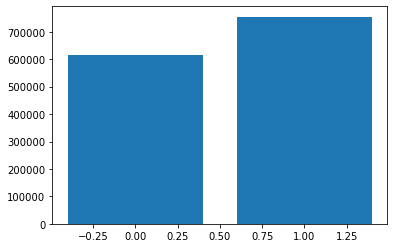

In [136]:
# Hardly any difference in sale price between remodeled and not remodeled
plt.bar(ames_geo_age['RemodYN'], ames_geo_age['SalePrice'])

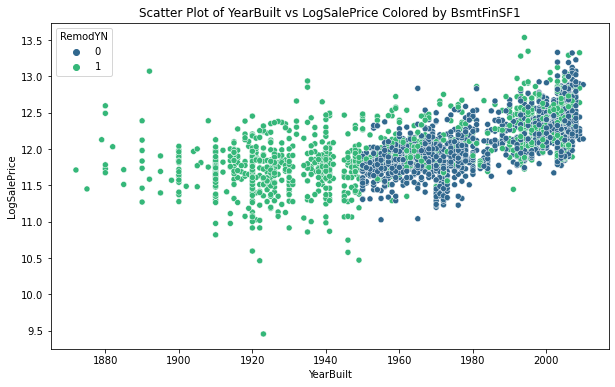

In [137]:
# Remodeling doesn't seem to impact the dispersion of sale prices per year built either. 
plt.figure(figsize=(10,6))
sns.scatterplot(data=ames_geo_age, x='YearBuilt', y='LogSalePrice', hue='RemodYN', palette='viridis')


plt.title('Scatter Plot of YearBuilt vs LogSalePrice Colored by BsmtFinSF1')
plt.xlabel('YearBuilt')
plt.ylabel('LogSalePrice')
plt.show()

# Basement SF seems to just be seen as additional living square footage for the most part

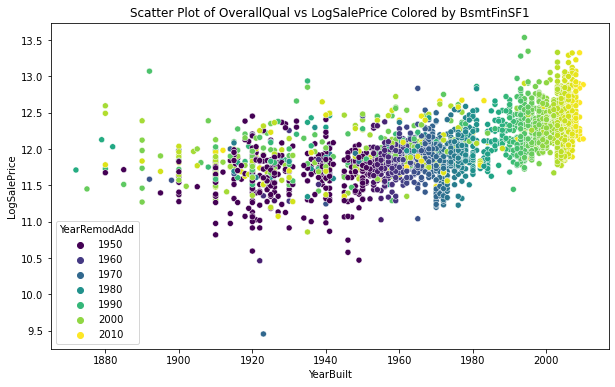

In [138]:
# Looks like year remodeled has a bit more of an impact on dispersion of year built
plt.figure(figsize=(10,6))
sns.scatterplot(data=ames_geo_age, x='YearBuilt', y='LogSalePrice', hue='YearRemodAdd', palette='viridis')


plt.title('Scatter Plot of OverallQual vs LogSalePrice Colored by BsmtFinSF1')
plt.xlabel('YearBuilt')
plt.ylabel('LogSalePrice')
plt.show()

# Should keep original features

<BarContainer object of 2556 artists>

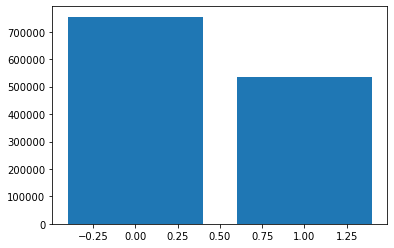

In [139]:
# Home being new doesn't correlate with higher price
plt.bar(ames_geo_age['IsNew'], ames_geo_age['SalePrice'])

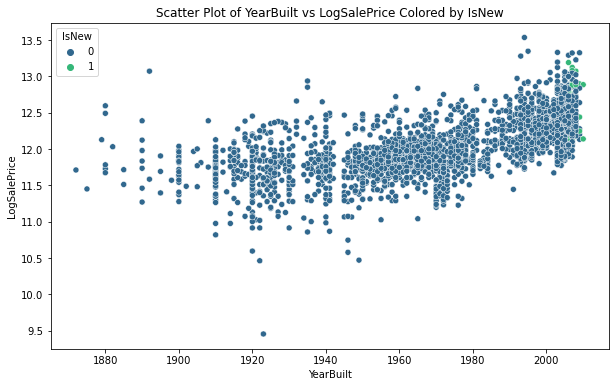

In [140]:
# Looks like year remodeled has a bit more of an impact on dispersion of year built
plt.figure(figsize=(10,6))
sns.scatterplot(data=ames_geo_age, x='YearBuilt', y='LogSalePrice', hue='IsNew', palette='viridis')


plt.title('Scatter Plot of YearBuilt vs LogSalePrice Colored by IsNew')
plt.xlabel('YearBuilt')
plt.ylabel('LogSalePrice')
plt.show()

# Should keep original features and leave out IsNew

In [141]:
# ames_geo_pca = ames_geo_pca.drop(columns=['YmSold', 'MoSold'])
ames_geo_pca.shape[1]

76

----------------------------------Garage Variables -------------------------------------------------

In [142]:
ames_geo_pca['GarageCars'].replace('None', 0, inplace=True)

In [143]:
ames_geo_pca['GarageCars']

0       2.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
2551    1.0
2552    2.0
2553    3.0
2554    2.0
2555    2.0
Name: GarageCars, Length: 2556, dtype: object

In [144]:
# Reformat odd floats
def remove_decimal_zero(x):
    if '.' in x and x.endswith('.0'):
        return x[:-2]
    return x

ames_geo_pca['GarageCars'] = ames_geo_pca['GarageCars'].astype(str).apply(remove_decimal_zero).astype(int)

ames_geo_pca['GarageArea'].corr(ames_geo_pca['GarageCars'])

0.8909965105922999

In [145]:
# Check with feature correlates better with target
corr_gcars = ames_geo_pca['GarageCars'].corr(ames_geo_pca['LogSalePrice'])
corr_garea = ames_geo_pca['GarageArea'].corr(ames_geo_pca['LogSalePrice'])

print(corr_gcars, corr_garea)

0.6674303389807874 0.6474327923074573


In [146]:
# Dropping Garage Area since high corr with Garage Cars and better corr with LogSalePrice
ames_geo_pca = ames_geo_pca.drop(columns='GarageArea')


--------------------------------Categoricals to Drop------------------------------------------------

NOTE: All categorical features turn out to have zero mean abs SHAP values in the XGB_hood model, as do numeric features: AcreGr, Street, CentralAir, 

In [147]:
# Alley has very low feature importance and SHAP values, and not much variance
ames_geo_pca['Alley'].value_counts()

ames_geo_pca = ames_geo_pca.drop(columns='Alley')

------------------House Types & Zoning: MSZoning, ClassPr_S, ClassSc_S, MSSubClass, HouseStyle, Exterior1st, Exterior2nd, MasVnrType, Foundation

Low ABS mean SHAP: ClassPr_S, MSSubClass, ClassSc_S, HouseStyle, Exterior1st, Exterior2nd, MasVnrType, Foundation
Med ABS mean SHAP: MSZoning, 

In [148]:
# CHECKING categorical var relationships with cross-tables

# pd.crosstab(ames_geo_pca['MSZoning'], ames_geo_pca['ClassPr_S'])
# pd.crosstab(ames_geo_pca['MSZoning'], ames_geo_pca['HouseStyle'])
# pd.crosstab(ames_geo_pca['MSSubClass'], ames_geo_pca['HouseStyle'])
# pd.crosstab(ames_geo_pca['MSSubClass'], ames_geo_pca['ClassSc_S'])
# pd.crosstab(ames_geo_pca['MSSubClass'], ames_geo_pca['Foundation'])
# pd.crosstab(ames_geo_pca['Exterior1st'], ames_geo_pca['Exterior2nd'])
pd.crosstab(ames_geo_pca['Exterior1st'], ames_geo_pca['MasVnrType'])


# No relationship b/t Zoning & Class or Style but looks like strong relationsihp b/t sub-class and style and sub-class and Sc_s
# Also strong relationship b/t Exterior1st and 2nd. No relationship b/t Exterior 1st and MasVnrType

MasVnrType,BrkCmn,BrkFace,None,Stone
Exterior1st,,,,
AsbShng,1,2,30,1
AsphShn,0,0,2,0
BrkComm,0,0,5,0
BrkFace,0,0,77,2
CBlock,0,0,1,0
CemntBd,0,16,64,15
HdBoard,5,207,192,12
ImStucc,0,0,1,0
MetalSd,2,106,278,16


<BarContainer object of 2556 artists>

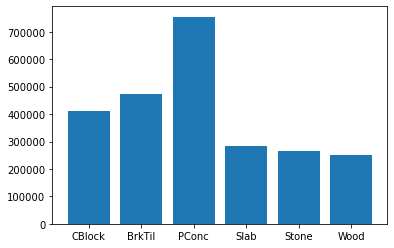

In [149]:
plt.bar(ames_geo_pca['Foundation'], ames_geo_pca['SalePrice'])

In [150]:
# Looks like I can label encode Foundation
ames_geo_pca['Foundation'] = ames_geo_pca['Foundation'].replace({'Wood':0, 'Stone':1, 'Slab':2, 'CBlock':3, 'BrkTil':4, 'PConc':5})
ames_geo_pca['Foundation'].describe()

count    2556.000000
mean        3.936228
std         1.000314
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Foundation, dtype: float64

In [151]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ames_geo_pca['MSSubClass'], ames_geo_pca['HouseStyle'])

# Chi-Squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

# Extremely high chi-squared value


Chi-Squared Value: 12718.631932516886
P-Value: 0.0


In [152]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ames_geo_pca['MSSubClass'], ames_geo_pca['ClassSc_S'])

# Chi-Squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

# Extremely high chi-squared value


Chi-Squared Value: 33929.58912894353
P-Value: 0.0


In [153]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# ANOVA for MSSubClass
model1 = ols('LogSalePrice ~ C(MSSubClass)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# ANOVA for HouseStyle
model2 = ols('LogSalePrice ~ C(HouseStyle)', data=ames_geo_pca).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print(anova_table1)
print(anova_table2)


                   sum_sq      df          F         PR(>F)
C(MSSubClass)  119.624161    15.0  78.948722  4.014600e-198
Residual       256.576135  2540.0        NaN            NaN
                   sum_sq      df          F        PR(>F)
C(HouseStyle)   30.847154     7.0  32.512702  1.586694e-43
Residual       345.353142  2548.0        NaN           NaN


In [154]:

# ANOVA for MSSubClass
model1 = ols('LogSalePrice ~ C(MSSubClass)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# ANOVA for ClassSc_S
model2 = ols('LogSalePrice ~ C(ClassSc_S)', data=ames_geo_pca).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print(anova_table1)
print(anova_table2)


                   sum_sq      df          F         PR(>F)
C(MSSubClass)  119.624161    15.0  78.948722  4.014600e-198
Residual       256.576135  2540.0        NaN            NaN
                  sum_sq      df          F         PR(>F)
C(ClassSc_S)  123.894187    20.0  62.240222  1.402289e-202
Residual      252.306108  2535.0        NaN            NaN


In [155]:
# MSSubClass & HouseStyle both low SHAP vals but they are highly correlated and sub class has strong relationship to Sale Price
# ames_geo_pca = ames_geo_pca.drop(columns=['HouseStyle'])

# Same is true for sub class vs ClassSc_S
ames_geo_pca = ames_geo_pca.drop(columns=['ClassSc_S'])

In [156]:
#MSZoning
ames_geo_pca['MSZoning'].value_counts()

# Look at houses that are C (commercial) and I (industrial)
# ames_geo_pca[ames_geo_pca['MSZoning'] == 'I (all)']

# For commercial and industrial, the ClassPr_S are all "RESIDENTIAL" so perhaps an error? 

# I will target encode this

RL         1999
RM          410
FV          113
RH           19
C (all)      14
I (all)       1
Name: MSZoning, dtype: int64

In [157]:

contingency_table = pd.crosstab(ames_geo_pca['Exterior1st'], ames_geo_pca['Exterior2nd'])

# Chi-Squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

# Extremely high chi-squared value


Chi-Squared Value: 21455.421205162227
P-Value: 0.0


In [158]:

# ANOVA for Exterior1st
model1 = ols('LogSalePrice ~ C(Exterior1st)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# ANOVA for Exterior2nd
model2 = ols('LogSalePrice ~ C(Exterior2nd)', data=ames_geo_pca).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print(anova_table1)
print(anova_table2)


                    sum_sq      df          F        PR(>F)
C(Exterior1st)   67.499177    14.0  39.685961  1.565590e-98
Residual        308.701119  2541.0        NaN           NaN
                    sum_sq      df          F        PR(>F)
C(Exterior2nd)   67.193604    15.0  36.821587  3.431872e-97
Residual        309.006692  2540.0        NaN           NaN


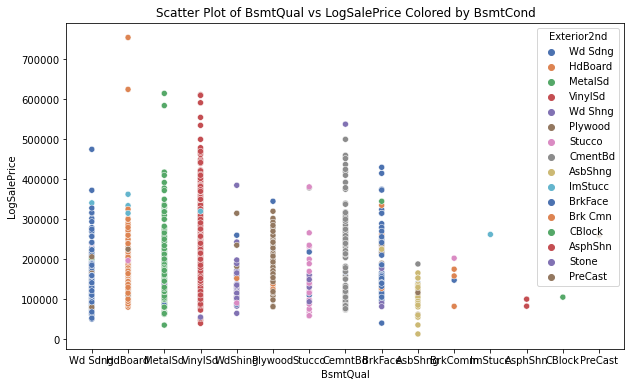

In [159]:
# See if there is an interaction between bsmtqual and bsmtcond in determining sale price
plt.figure(figsize=(10,6))
sns.scatterplot(data=ames_geo_pca, x='Exterior1st', y='SalePrice', hue='Exterior2nd', palette='deep')


plt.title('Scatter Plot of BsmtQual vs LogSalePrice Colored by BsmtCond')
plt.xlabel('BsmtQual')
plt.ylabel('LogSalePrice')
plt.show()



In [160]:
# Because Ext1st and Ext2nd are highly correlated and Ext1st has a slightly higher corr with Sale Price, drop 2nd
ames_geo_pca = ames_geo_pca.drop(columns=['Exterior2nd'])

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

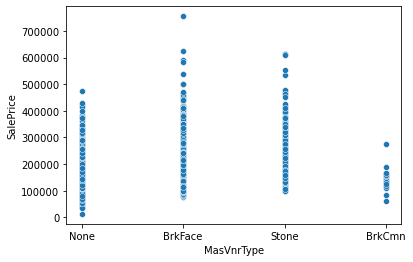

In [161]:
sns.scatterplot(data=ames_geo_pca, x='MasVnrType', y='SalePrice')
# Show a huge dispersion in sale prices per type of exterior masonry. So this var is not highly correlated with Sale Price

In [162]:
# MasVnrType not corr with Price and not important to models, so dropping
ames_geo_pca = ames_geo_pca.drop(columns=['MasVnrType'])

----------------------------------------------------Roof Variables--------------------------------------------------

In [163]:

contingency_table = pd.crosstab(ames_geo_pca['RoofStyle'], ames_geo_pca['RoofMatl'])

# Chi-Squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")


Chi-Squared Value: 2241.9503026567327
P-Value: 0.0


In [164]:
contingency_table

RoofMatl,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
RoofStyle,,,,,,,
Flat,1,1,1,0,12,0,0
Gable,2029,0,0,1,5,0,5
Gambrel,18,0,0,0,0,0,0
Hip,464,0,0,0,0,4,1
Mansard,7,0,0,0,0,3,0
Shed,2,0,0,0,0,1,1


In [165]:

# ANOVA for RoofStyle
model1 = ols('LogSalePrice ~ C(RoofStyle)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# ANOVA for RoofMatl
model2 = ols('LogSalePrice ~ C(RoofMatl)', data=ames_geo_pca).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print(anova_table1)
print(anova_table2)


                  sum_sq      df          F        PR(>F)
C(RoofStyle)   16.379819     5.0  23.216321  7.159193e-23
Residual      359.820476  2550.0        NaN           NaN
                 sum_sq      df         F    PR(>F)
C(RoofMatl)    4.772596     6.0  5.458822  0.000013
Residual     371.427700  2549.0       NaN       NaN


In [166]:
# Dropping RoofMatl b/c less of an association with LogSalePrice than RoofStyle
ames_geo_pca = ames_geo_pca.drop(columns=['RoofMatl'])

Garage Variables: GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - already handled GarageCars vs Garage Area. GarageCond removed b/c high corr with GarageQual

Low or zero SHAP vals: GarageType, GarageYrBlt, GarageQual, 
Mid SHAP vals: GarageFinish

In [167]:
ames_geo_pca['GarageType'].count()
ames_geo_pca['GarageYrBlt'].count()

# sns.scatterplot(data=ames_geo_pca, x='GarageType', y='GarageYrBlt')
# No relationship b/t garage type and year built

pd.crosstab(ames_geo_pca['GarageFinish'], ames_geo_pca['GarageQual'])

GarageQual,0,1,2,3,4,5
GarageFinish,,,,,,
0,128,0,0,0,0,0
1,0,4,105,980,5,2
2,0,0,2,704,10,0
3,0,0,1,608,6,1


In [168]:



contingency_table = pd.crosstab(ames_geo_pca['GarageQual'], ames_geo_pca['GarageFinish'])

# Chi-Squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")


Chi-Squared Value: 2697.3174127030134
P-Value: 0.0


In [169]:

# ANOVA for GarageQual
model1 = ols('LogSalePrice ~ C(GarageQual)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# ANOVA for GarageFinish
model2 = ols('LogSalePrice ~ C(GarageFinish)', data=ames_geo_pca).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print(anova_table1)
print(anova_table2)


                   sum_sq      df          F        PR(>F)
C(GarageQual)   52.700503     5.0  83.082763  4.874787e-81
Residual       323.499793  2550.0        NaN           NaN
                     sum_sq      df           F         PR(>F)
C(GarageFinish)  129.951406     3.0  448.917069  3.418059e-234
Residual         246.248889  2552.0         NaN            NaN


In [170]:
# Removing GarageQual as it is highly associated with GarageFinish and more related to LogSalePrice
ames_geo_pca = ames_geo_pca.drop(columns=['GarageQual'])

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

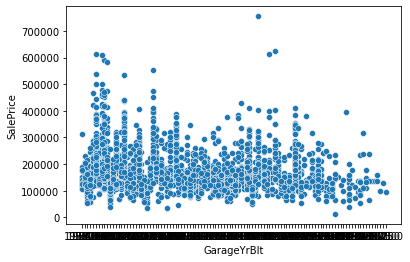

In [171]:
# sns.scatterplot(data=ames_geo_pca, x='GarageType', y='SalePrice')
# No relationship b/t garage type and sale price

sns.scatterplot(data=ames_geo_pca, x='GarageYrBlt', y='SalePrice')
# Same thing with garage year built

In [172]:
# Dropping GarageType and GarageYrBlt because they have very low SHAP vals and low corr with SalePrice
ames_geo_pca = ames_geo_pca.drop(columns=['GarageType', 'GarageYrBlt'])

-----------------------------------------------BASEMENT CATEGORICAL FEATURES--------------------------------------------------------------
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
These were already label encoded in EDA1, so looking to see if we can combine or drop any.
BsmtExposure has mid (2k) SHAP val for XGBoost and mid-low for RF
BsmtFinType1 has mid (1.3k) SHAP val for RF as well as XGB (4.4k)
BsmtFinType2 has low SHAP for for both (200)


<AxesSubplot:>

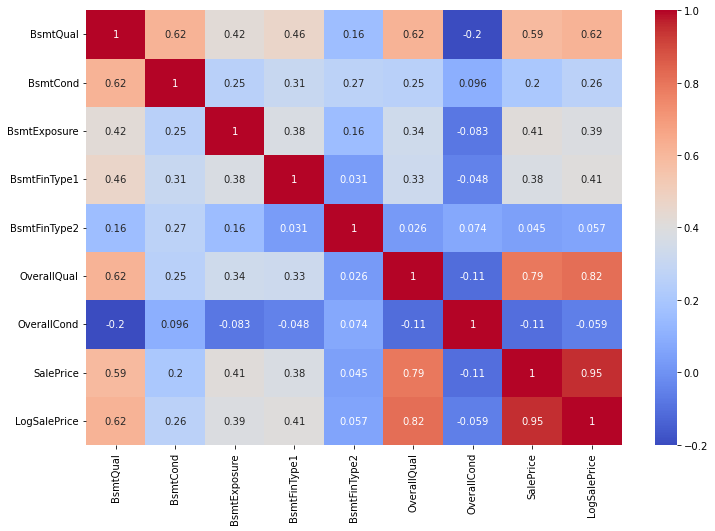

In [173]:
selected_columns = ames_geo_pca[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'OverallQual', 'OverallCond', 
                                 'SalePrice', 'LogSalePrice']]

corr_matrix = selected_columns.corr()

# Create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

We see high corrs for BsmtQual-OverallQual, BsmtQual-BsmtCond, BsmtQual-LogSalePrice. But these are max 0.62, so not high enough to drop one or the other. I can check if adding, multiplying or taking the mean of these corr better to LogSalePrice than just BsmtQual. I can try PCA.

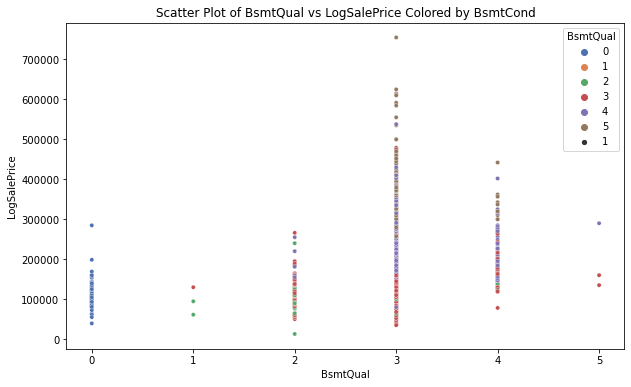

In [174]:
# Looks like BsmtCond has no impact on dispersion of BsmtQual vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(data=ames_geo_pca, x='BsmtCond', y='SalePrice', hue='BsmtQual', palette='deep', size=1)


plt.title('Scatter Plot of BsmtQual vs LogSalePrice Colored by BsmtCond')
plt.xlabel('BsmtQual')
plt.ylabel('LogSalePrice')
plt.show()



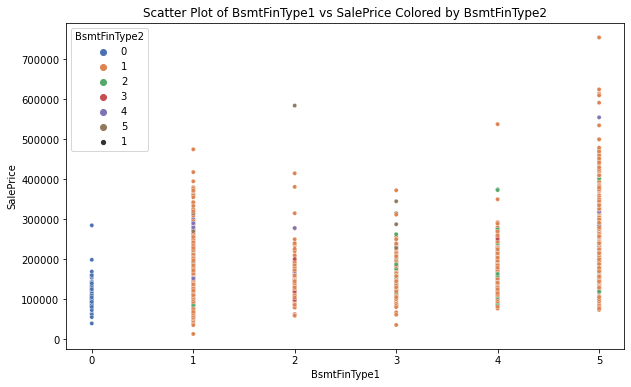

In [175]:
# Looks like BsmtCond has no impact on dispersion of BsmtQual vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(data=ames_geo_pca, x='BsmtFinType1', y='SalePrice', hue='BsmtFinType2', palette='deep', size=1)


plt.title('Scatter Plot of BsmtFinType1 vs SalePrice Colored by BsmtFinType2')
plt.xlabel('BsmtFinType1')
plt.ylabel('SalePrice')
plt.show()

# doesn't look like BsmtFinType2 impacts dispersion of Type1 house price

In [176]:
# Because BsmtCond corrs with BsmtQaul, but does not look to impact BsmtQual's relationship with SalePrice,
# and b/c it has a low SHAP val for both models, I'm going to drop it. Also dropping BsmtFinType2 as not important
ames_geo_pca = ames_geo_pca.drop(columns=['BsmtCond', 'BsmtFinType2'])

In [177]:
ames_geo_pca.columns

Index(['PID', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'PoolArea', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'LogSalePrice', 'ClassPr_S', 'AcreGr',
       'AcreNt_S', 'Latitude', 'Longitude', 'LF_median', 'YmSold',
       'DistanceFromCenter', 'total_baths', 'TotalPorchSF', 'TotalFinSF'],
      dtype='object')

----------------------------------------Land & Lot-------------------------------------------------------------------
'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','AcreGr','AcreNt_S'
Num:' LotArea', 'LotShape','AcreGr','AcreNt_S'
Cats: 'LandContour', 'LotConfig', 'LandSlope'

Low SHAP: LandContour, LotConfig, LandSlope, LotShape, AcreGr, AcreNt_S
Mid SHAP: LotArea, 

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

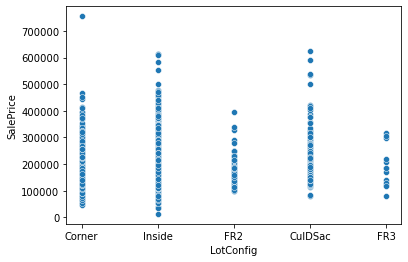

In [178]:
# Check cat relationships to target var
# sns.boxplot(data=ames_geo_pca, x='LandContour', y='SalePrice')
# sns.scatterplot(data=ames_geo_pca, x='LandSlope', y='SalePrice')
sns.scatterplot(data=ames_geo_pca, x='LotConfig', y='SalePrice')

# These do not look like ordinal factors, nor do they look to have a strong relationship with SalePrice

In [179]:
pd.crosstab(ames_geo_pca['LandContour'], ames_geo_pca['LandSlope'])
# Vast majority of homes are gentle and level

LandSlope,Gtl,Mod,Sev
LandContour,,,
Bnk,70,22,1
HLS,62,30,2
Low,15,27,9
Lvl,2290,27,1


In [180]:

contingency_table = pd.crosstab(ames_geo_pca['LandContour'], ames_geo_pca['LandSlope'])

# Chi-Squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

# Not a very high CS value so not that strongly correlated. 

Chi-Squared Value: 951.0491397377318
P-Value: 3.447035923415817e-202


In [181]:

# ANOVA for LandContour
model1 = ols('LogSalePrice ~ C(LandContour)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# ANOVA for LandSlope
model2 = ols('LogSalePrice ~ C(LandSlope)', data=ames_geo_pca).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print(anova_table1)
print(anova_table2)
# Neither has much impact on the depending variable so I will drop 

                    sum_sq      df          F        PR(>F)
C(LandContour)    9.993851     3.0  23.214872  8.004030e-15
Residual        366.206445  2552.0        NaN           NaN
                  sum_sq      df         F    PR(>F)
C(LandSlope)    1.836895     2.0  6.263424  0.001934
Residual      374.363400  2553.0       NaN       NaN


In [182]:
# Drop LandContour and LandSlope as not correlated with each other or target and low importance/SHAP
ames_geo_pca = ames_geo_pca.drop(columns=['LandContour', 'LandSlope'])

In [183]:
# Also dropping LotConfig for same reasons as above
ames_geo_pca = ames_geo_pca.drop(columns=['LotConfig'])

In [184]:
# Checking out 'AcreGr','AcreNt_S'
ames_geo_pca[['AcreGr','AcreNt_S']].describe()
# looks like a lot of zeroes
ames_geo_pca[ames_geo_pca['AcreGr']==0].count()
ames_geo_pca.shape
# 2551 out of 2556 rows for AcreGr are zero
ames_geo_pca[ames_geo_pca['AcreNt_S']==0].count()
# 2553 are zero for AcreNt_S
# Dropping both
ames_geo_pca = ames_geo_pca.drop(columns=['AcreGr','AcreNt_S'])

In [185]:
# Checking out LotShape
ames_geo_pca['LotShape'].describe() #label encoded in EDA1

ames_geo_pca['LotShape'].corr(ames_geo_pca['LogSalePrice']) # -0.31 corr with LogSalePrice

# This has a large enough SHAP value in XGB to keep for now

-0.3117770651111747

---------------------------------------Heating, AC, Electrical-------------------------------------------------------
'Heating','HeatingQC', 'CentralAir', 'Electrical',

Heating QC is label encoded, CentralAir is binary encoded. Others are still categories

Low SHAP: Heating, Electrical
Mid SHAP: HeatingQC, CentralAir

<AxesSubplot:xlabel='Heating', ylabel='HeatingQC'>

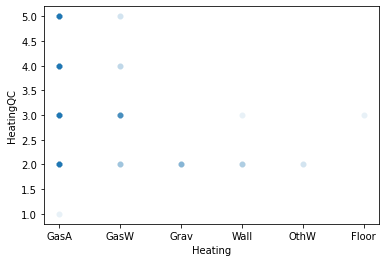

In [186]:
# Check out Heating
ames_geo_pca['Heating'].value_counts() #2516 of 2556 are GasA

sns.scatterplot(data=ames_geo_pca, x='Heating', y='HeatingQC', alpha=0.1) # doesn't look to have a strong corr to heating quality

In [187]:
# ANOVA for Heating to LogSalePrice
model1 = ols('LogSalePrice ~ C(Heating)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

print(anova_table1)

                sum_sq      df         F        PR(>F)
C(Heating)    5.947638     5.0  8.192501  1.098561e-07
Residual    370.252658  2550.0       NaN           NaN


In [188]:
# Dropping Heating b/c low variance, low corr to target and low importance/SHAP
ames_geo_pca = ames_geo_pca.drop(columns=['Heating'])

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

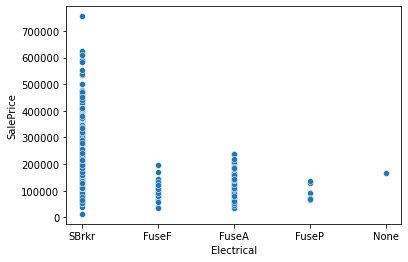

In [189]:
# Checking out electrical
ames_geo_pca['Electrical'].value_counts() # SBrkr is 2347 of total 2556 - low variance

sns.scatterplot(data=ames_geo_pca, x='Electrical', y='SalePrice') 
# looks like binary relationship with target - houses over 250k all have SBrkr

# I will target encode this

---------------------------------------Randoms: Fence, Pool, Fireplace----------------------------------------------------
Fireplaces: number of fireplaces; mid-high SHAP; low pfeature importance
Fence: categorical, fence quality (label encode?); low pfeature importance; low SHAPs
PoolArea: all low SHAP & permuted
MiscFeature - categorical, random things like elevator or tennis court; low SHAPs, low permuted
MiscVal - all low permuted and feature

In [190]:
ames_geo_pca[['Fireplaces', 'Fence', 'PoolArea', 'MiscFeature', 'MiscVal']]

(ames_geo_pca[['Fireplaces', 'PoolArea', 'MiscVal']] == 0).sum()
# zeros: 1200 Fireplaces, 2500 for PoolArea and MiscVal


Fireplaces    1227
PoolArea      2547
MiscVal       2461
dtype: int64

In [191]:
# Dropping all but Fireplaces b/c not important and low variance
ames_geo_pca = ames_geo_pca.drop(columns=['Fence', 'PoolArea', 'MiscFeature', 'MiscVal'])

------------------------------------------Kitchen------------------------------------------------------
KitchenAbvGr - low SHAP & Permuted
KitchenQual - mid SHAP, low permuted

In [192]:
ames_geo_pca['KitchenAbvGr'].corr(ames_geo_pca['KitchenQual'])
# not strongly correlated

ames_geo_pca['KitchenAbvGr'].corr(ames_geo_pca['LogSalePrice'])
# not strongly correlated

-0.12555705916149898

In [193]:
# Dropping KitchenAbvGr
ames_geo_pca = ames_geo_pca.drop(columns=['KitchenAbvGr'])

--------------------------------------SALE RELATED---------------------------------------------
SaleType - Low SHAPS; low permuted
SaleCondition - Low SHAPS; low permuted

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

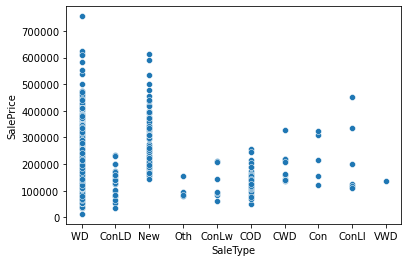

In [194]:
sns.scatterplot(data=ames_geo_pca, x='SaleType', y='SalePrice')

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

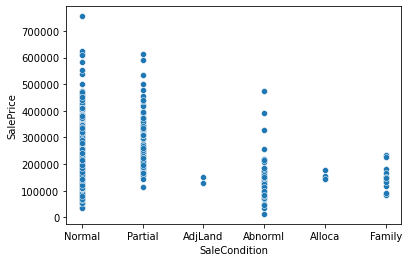

In [195]:
sns.scatterplot(data=ames_geo_pca, x='SaleCondition', y='SalePrice')

In [196]:
# Sale Condition can be logically merged into Normal and Abnormal
ames_geo_pca['SaleCondition']= ames_geo_pca['SaleCondition'].replace({'Partial':'Normal', 'Alloca':'Normal', 'AdjLand':'Abnormal', 'Family':'Abnormal'})

In [197]:
# Check and label encode
ames_geo_pca['SaleCondition']= ames_geo_pca['SaleCondition'].replace({'Abnormal':'Abnorml'})
ames_geo_pca['SaleCondition']= ames_geo_pca['SaleCondition'].replace({'Abnorml': 0, 'Normal':1})
ames_geo_pca['SaleCondition'].value_counts()

1    2478
0      78
Name: SaleCondition, dtype: int64

In [198]:
# Dropping SaleType as little info
ames_geo_pca = ames_geo_pca.drop(columns=['SaleType'])

---------------------------------------Other----------------------------------------------------
Street: low SHAP & permuted
BldgType: low SHAP & permuted
PavedDrive: low SHAP & permuted

In [199]:
ames_geo_pca[['Street', 'BldgType', 'PavedDrive']].describe()

,Street,PavedDrive
count,2556.000000,2556.000000
mean,0.996479,1.838028
std,0.059246,0.523777
min,0.000000,0.000000
25%,1.000000,2.000000
50%,1.000000,2.000000
75%,1.000000,2.000000
max,1.000000,2.000000


In [200]:

contingency_table = pd.crosstab(ames_geo_pca['MSSubClass'], ames_geo_pca['BldgType'])

# Chi-Squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

# Decently high corr

Chi-Squared Value: 8104.592276621104
P-Value: 0.0


c:\Users\willf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

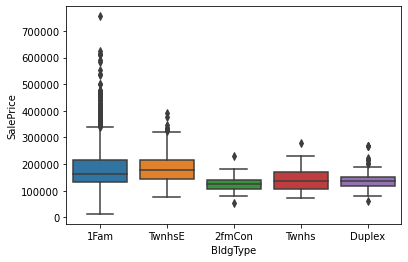

In [201]:
pd.crosstab(ames_geo_pca['MSSubClass'], ames_geo_pca['BldgType'])

sns.boxplot(ames_geo_pca['BldgType'], ames_geo_pca['SalePrice'])

In [202]:

# ANOVA for MSSubClass
model1 = ols('LogSalePrice ~ C(MSSubClass)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# ANOVA for BldgType
model2 = ols('LogSalePrice ~ C(BldgType)', data=ames_geo_pca).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print(anova_table1)
print(anova_table2)
# Neither has much impact on the depending variable so I will drop 

                   sum_sq      df          F         PR(>F)
C(MSSubClass)  119.624161    15.0  78.948722  4.014600e-198
Residual       256.576135  2540.0        NaN            NaN
                 sum_sq      df          F        PR(>F)
C(BldgType)   15.256028     4.0  26.955774  6.163463e-22
Residual     360.944267  2551.0        NaN           NaN


In [203]:
# Dropping BldgType b/c low importance/SHAP and low corr to target
ames_geo_pca = ames_geo_pca.drop(columns=['BldgType'])

In [204]:
(ames_geo_pca[['Street', 'PavedDrive']] == 2).sum()
# Street is binary and only has 9 unpaved
# PavedDrive is also low variance

Street           0
PavedDrive    2319
dtype: int64

In [205]:
# ANOVA for Street
model1 = ols('LogSalePrice ~ C(Street)', data=ames_geo_pca).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# ANOVA for PavedDrive
model2 = ols('LogSalePrice ~ C(PavedDrive)', data=ames_geo_pca).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print(anova_table1)
print(anova_table2)
# Neither has much impact on the depending variable so I will drop 

               sum_sq      df         F    PR(>F)
C(Street)    1.236210     1.0  8.420224  0.003742
Residual   374.964085  2554.0       NaN       NaN
                   sum_sq      df           F        PR(>F)
C(PavedDrive)   44.556415     2.0  171.498003  1.303981e-70
Residual       331.643881  2553.0         NaN           NaN


In [206]:
# PavedDrive has a decent corr to target so just dropping street
ames_geo_pca = ames_geo_pca.drop(columns=['Street'])

In [207]:
ames_geo_pca.columns

Index(['PID', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape',
       'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleCondition', 'LogSalePrice', 'ClassPr_S', 'Latitude', 'Longitude',
       'LF_median', 'YmSold', 'DistanceFromCenter', 'total_baths',
       'TotalPorchSF', 'TotalFinSF'],
      dtype='object')

In [208]:
# Look into 1st and 2nd floor SF, as well as TotalBsmtSF, vs TotalFinSF
ames_geo_pca[['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'TotalFinSF' ]]

,1stFlrSF,2ndFlrSF,TotalBsmtSF,TotalFinSF
0,856,0,856.0,1094.0
1,1049,0,1049.0,1994.0
2,1001,0,837.0,1738.0
3,717,322,405.0,1039.0
4,810,855,810.0,2308.0
...,...,...,...,...
2551,952,0,952.0,952.0
2552,1733,0,0.0,1733.0
2553,1001,1001,1001.0,2286.0
2554,985,857,985.0,2683.0


In [209]:
ames_geo_SF2 = ames_geo_pca[['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'TotalFinSF', 'SalePrice', 'LogSalePrice' ]]
ames_geo_SF2['AbvGrdSF'] = ames_geo_SF2[['1stFlrSF','2ndFlrSF']].sum(axis=1)

ames_geo_SF2['AbvGrdSF'].corr(ames_geo_SF2['TotalFinSF'])
# These are highly correlated at 0.78

ames_geo_SF2['2ndFlrYN'] = ames_geo_SF2['2ndFlrSF'].apply(lambda x: 0 if x == 0 else 1)
ames_geo_SF2[['2ndFlrYN', '2ndFlrSF']]


C:\Users\willf\AppData\Local\Temp\ipykernel_45508\45259695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_SF2['AbvGrdSF'] = ames_geo_SF2[['1stFlrSF','2ndFlrSF']].sum(axis=1)
C:\Users\willf\AppData\Local\Temp\ipykernel_45508\45259695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_geo_SF2['2ndFlrYN'] = ames_geo_SF2['2ndFlrSF'].apply(lambda x: 0 if x == 0 else 1)


,2ndFlrYN,2ndFlrSF
0,0,0
1,0,0
2,0,0
3,1,322
4,1,855
...,...,...
2551,0,0
2552,0,0
2553,1,1001
2554,1,857


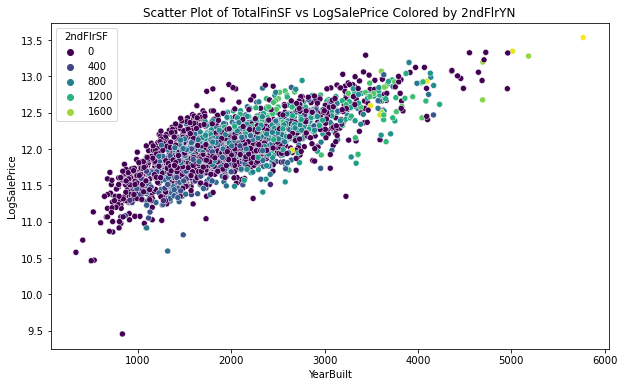

In [210]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ames_geo_SF2, x='TotalFinSF', y='LogSalePrice', hue='2ndFlrSF', palette='viridis')


plt.title('Scatter Plot of TotalFinSF vs LogSalePrice Colored by 2ndFlrYN')
plt.xlabel('YearBuilt')
plt.ylabel('LogSalePrice')
plt.show()

# It doesn't look like first floor SF, second floor SF or binary second floor Y/N matter for target. Just Total finished SF

In [211]:
# Dropping 1st & 2nd floor SF
ames_geo_pca = ames_geo_pca.drop(columns=['1stFlrSF', '2ndFlrSF'])

Check out YrSold vs YmSold
YrSold: low SHAPs and permutation importances
YmSold is one-hot encoded in models

<AxesSubplot:xlabel='YmSold', ylabel='SalePrice'>

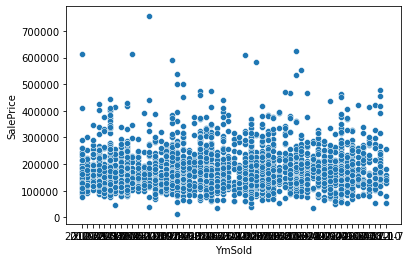

In [212]:
sns.scatterplot(data=ames_geo_pca, x='YmSold', y='SalePrice' )

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

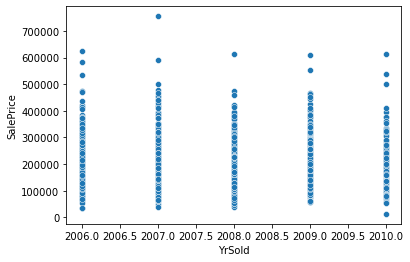

In [213]:
sns.scatterplot(data=ames_geo_pca, x='YrSold', y='SalePrice' )

In [214]:
# Dropping both of these b/c low SHAP & permuation, 2008 crisis and low corr to target
ames_geo_pca = ames_geo_pca.drop(columns=['YrSold', 'YmSold'])

0.29247756678571

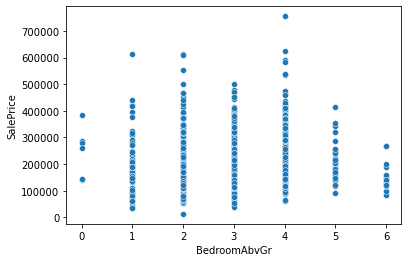

In [215]:
#Check out BedroomAbvGr
sns.scatterplot(data=ames_geo_pca, x='BedroomAbvGr', y='SalePrice' )
# no visible relationship
ames_geo_pca['BedroomAbvGr'].corr(ames_geo_pca['LogSalePrice'])
# no strong corr with target
ames_geo_pca['BedroomAbvGr'].corr(ames_geo_pca['TotalFinSF'])
# no strong corr with total finished SF
# Seems to have decent SHAP values so I will keep it

In [216]:
ames_geo_pca.columns

Index(['PID', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape',
       'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'MoSold', 'SaleCondition', 'LogSalePrice', 'ClassPr_S',
       'Latitude', 'Longitude', 'LF_median', 'DistanceFromCenter',
       'total_baths', 'TotalPorchSF', 'TotalFinSF'],
      dtype='object')

In [217]:
ames_geo_pca.select_dtypes(include=['object', 'category']).columns

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Electrical', 'ClassPr_S'],
      dtype='object')

In [218]:
ames_geo_pca.to_csv("ames_dimreduced.csv")